<a href="https://colab.research.google.com/github/eminshall/Notebooks-Youtube-Channel/blob/main/Hedging_Beta_for_Crypto_Portfolio_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import yfinance as yf
from datetime import datetime, date
import datetime

In [ ]:
symbols = ['BTC-USD','ETH-USD','USDT-USD','XRP-USD','SOL-USD','BNB-USD','DOGE-USD']

end = date.today()
start = end - datetime.timedelta(days = 2*365)

#start = '2020-01-01'
#end = '2022-12-31'

data = yf.download(symbols, start, end)['Close']

[*********************100%***********************]  9 of 9 completed


In [ ]:
data.head()

Ticker,CDE,JNJ,LLY,MRK,NEM,RGLD,SPY,SSRM,UNH
Date,,,,,,,,,
2023-01-19,4.03,159.487885,345.396637,104.068115,49.202286,121.942024,377.973267,16.290756,469.820129
2023-01-20,4.17,158.744675,340.467743,104.105995,50.018101,122.877708,385.014587,16.761248,472.109314
2023-01-23,4.15,158.340149,336.670227,104.049187,50.290043,123.140877,389.634186,16.751444,471.226593
2023-01-24,4.10,158.340149,340.782562,102.761353,50.064991,125.060997,389.215973,16.908276,476.842804
2023-01-25,4.20,159.469040,344.068542,102.827621,51.659115,128.101974,389.361816,17.280746,477.715820


In [ ]:
bench_returns = (data
                 .pop('BTC-USD')
                 .pct_change()
                 .dropna()
                 )
bench_returns.head()

,SPY
Date,
2023-01-20,0.018629
2023-01-23,0.011999
2023-01-24,-0.001073
2023-01-25,0.000375
2023-01-26,0.010991


In [ ]:
portfolio_returns = (data.pct_change().dropna().sum(axis=1))
portfolio_returns.name = 'portfolio'
portfolio_returns.head()

,portfolio
Date,
2023-01-20,0.074181
2023-01-23,-0.013920
2023-01-24,0.020188
2023-01-25,0.121824
2023-01-26,-0.103435


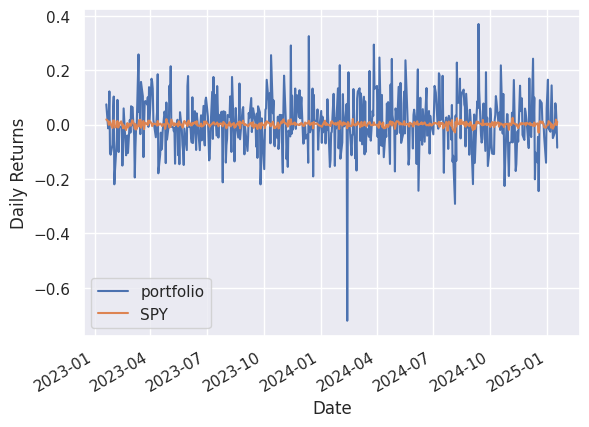

In [ ]:
portfolio_returns.plot()
bench_returns.plot()
plt.ylabel('Daily Returns')
plt.legend()

In [ ]:
X = bench_returns.values
Y = portfolio_returns.values
def linreg(x, y):
  x = sm.add_constant(x)
  model = regression.linear_model.OLS(y, x).fit()
  x = x[:, 1]
  return model.params[0], model.params[1]

In [ ]:
alpha, beta = linreg(X, Y)
print(f'Alpha: {alpha}')
print(f'Beta: {beta}')

Alpha: -0.0015007626229250198
Beta: 4.906140932262483


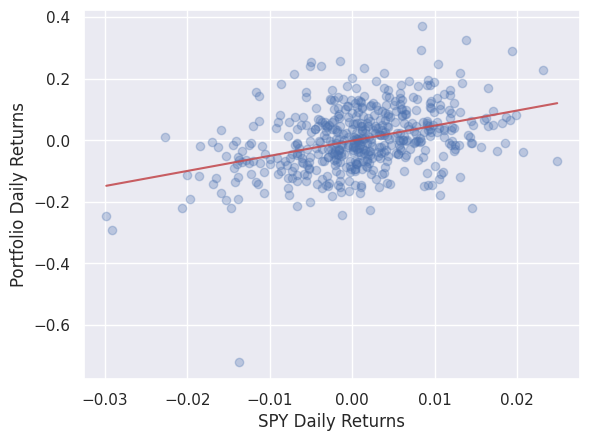

In [ ]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha
plt.scatter(X, Y, alpha=0.3)
plt.xlabel('SPY Daily Returns')
plt.ylabel('Portfolio Daily Returns')
plt.plot(X2, Y_hat, 'r', alpha=0.9)

In [ ]:
hedged_portfolio_returns = -1 * beta * bench_returns + portfolio_returns

P = hedged_portfolio_returns.values
_, beta = linreg(X, P)
print(f'Beta: {beta}')

Beta: -6.760154964632436e-16


In [ ]:
def information_ratio(portfolio_returns, bench_returns):
  active_return = portfolio_returns - bench_returns
  tracking_error = active_return.std()
  return active_return.mean() / tracking_error

In [ ]:
hedged_ir = information_ratio(hedged_portfolio_returns, bench_returns)

unhedged_ir = information_ratio(portfolio_returns, bench_returns)

print(f'Hedged Information Ratio: {hedged_ir}')
print(f'Unhedged Information Ratio: {unhedged_ir}')

Hedged Information Ratio: -0.025113196796735862
Unhedged Information Ratio: 0.021533867664293063


# Consider Supporting Me

Making theses videos takes time and effort. Contributions from viewers like you help support my channel and avoid the need for promoting a Patreon, sponsors, or selling a course. Click the link and choose any amount you'd like. Thank you.

https://ko-fi.com/minshallsfi